# 1a)


### Training Model ###

[Iteration 0] x1: 1.1626267123287672 x2: 0.3469924657534247 b: 0.10000000000000002 cost: 0.5
[Iteration 1000] x1: 126.04078349498225 x2: 59.68692382725792 b: 11.69912128757295 cost: 0.04284104669348138
[Iteration 2000] x1: 123.84146515908031 x2: 68.19488003890972 b: 12.021800742480524 cost: 0.04257371718241771
[Iteration 3000] x1: 123.08932146164554 x2: 71.07857335189203 b: 12.293515925734441 cost: 0.042596673166134864
[Iteration 4000] x1: 122.83411682550779 x2: 72.05648702031142 b: 12.548459639314434 cost: 0.042617975701204
[Iteration 5000] x1: 122.74744241084971 x2: 72.38808457637091 b: 12.797706820386825 cost: 0.0426267557261557
[Iteration 6000] x1: 122.71792247825456 x2: 72.50049380276471 b: 13.045013294873506 cost: 0.042629913123041416
[Iteration 7000] x1: 122.70778563043767 x2: 72.53856862551119 b: 13.291652794786172 cost: 0.04263100545746723
[Iteration 8000] x1: 122.70422226940308 x2: 72.55143406231599 b: 13.538057287545168 cost: 0.04263137925912623
[Ite

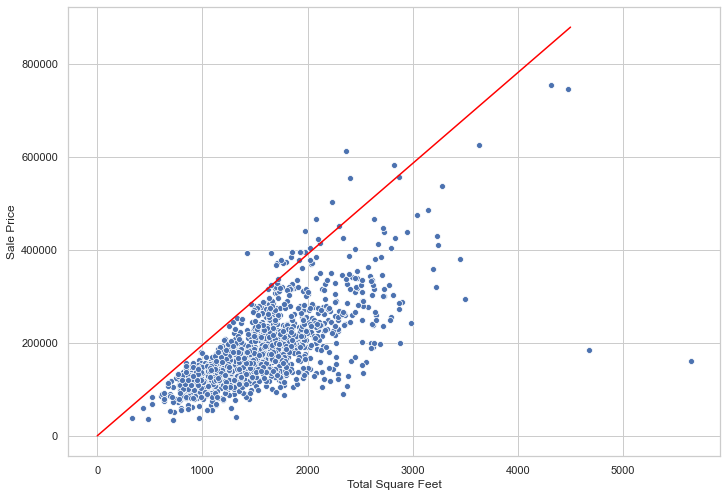

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def LRGradDesc(data, target, init_x1=0, init_x2=0, init_b=0,
    learning_rate_w=0.001, learning_rate_b=0.1, max_iter=10000):

    sns.set(style="whitegrid",rc={'figure.figsize':(11.7,8.27)})
    tot_area = data.iloc[:,0] + data.iloc[:, 1]
    plotting_data = pd.DataFrame({
        'Total Square Feet': tot_area,
        'Sale Price': target})
    sns.scatterplot(x="Total Square Feet", y="Sale Price", data=plotting_data)

    print("\n### Training Model ###\n")
    N = len(data.iloc[:, 0])
    current_x1 = init_x1
    current_x2 = init_x2
    current_b = init_b
    for i in range(max_iter):
        prediction = np.dot(data.iloc[:,0], current_x1) + np.dot(data.iloc[:,1], current_x2) + current_b

        diff = np.divide(prediction - target, target)
        cost = np.sum(diff ** 2) / (2. * N)

        x1_grad = np.dot((learning_rate_w/N), np.sum(np.dot(data.iloc[:,0], diff)))
        x2_grad = np.dot((learning_rate_w/N), np.sum(np.dot(data.iloc[:,1], diff)))
        b_grad = np.dot((learning_rate_b/N), np.sum(diff))
    
        current_x1 = current_x1 - x1_grad
        current_x2 = current_x2 - x2_grad
        current_b = current_b - b_grad

        if i % 1000 == 0:
            print("[Iteration " + str(i) + "] x1: " + str(current_x1) + " x2: " + str(current_x2) + " b: " + str(current_b) + " cost: " + str(cost))

        if i == max_iter - 1:
            print("\n### Final Results ###\n")
            print("Final Cost: %.2f" % cost)
            print("[Iteration " + str(i) + "] x1: " + str(current_x1) + " x2: " + str(current_x2) + " b: " + str(current_b) + " cost: " + str(cost))
    
    plt.plot(range(4500), np.dot(range(4500), current_x1) + np.dot(range(4500), current_x2) + current_b, color='red')
    plt.show()
    return current_x1, current_x2, current_b

if __name__ == "__main__":
    data_file = pd.read_csv("data-sets/housing-prices-dataset/train.csv", usecols=[43,44,80])
    x1, x2, b = LRGradDesc(data_file.iloc[:,:2], data_file.iloc[:,2])

# 1b)

Final Cost: 0.05
x1: 143.70
x2: 83.90
b: -15261.83


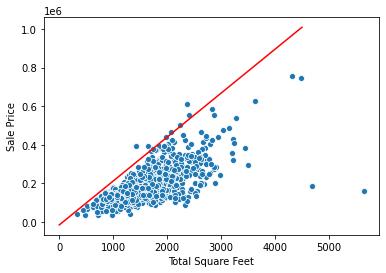

In [22]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

def LRGradDesc(x_train, y_train):
    
    tot_area = x_train.iloc[:,0] + x_train.iloc[:, 1]
    plotting_data = pd.DataFrame({
        'Total Square Feet': tot_area,
        'Sale Price': y_train})
    sns.scatterplot(x="Total Square Feet", y="Sale Price", data=plotting_data)
    
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)

    N = len(x_train.iloc[:, 0])
    prediction = regr.predict(x_train)
    diff = np.divide(prediction - y_train, y_train)
    cost = np.sum(diff ** 2) / (2. * N)
    # The coefficients
    print("Final Cost: %.2f" % cost)
    print('x1: %.2f' % regr.coef_[0])
    print('x2: %.2f' % regr.coef_[1])
    print('b: %.2f' % regr.intercept_)

    plt.plot(range(4500), np.dot(range(4500), regr.coef_[0]) + np.dot(range(4500), regr.coef_[1]) + regr.intercept_, color='red')
    plt.show()

if __name__ == "__main__":
    data_train = pd.read_csv("data-sets/housing-prices-dataset/train.csv", usecols=[43,44,80])
    LRGradDesc(data_train.iloc[:,:2], data_train.iloc[:,2])

# 1c)

I found the best case for learning rates to be 0.001 for w and 0.1 for b

# 2a)


### 5-fold Validation Results ###
Accuracy: 0.7597402597402597


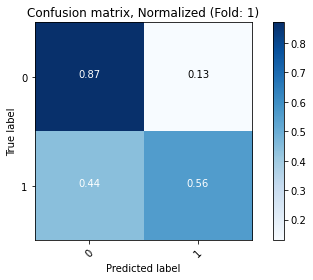

Accuracy: 0.7207792207792207


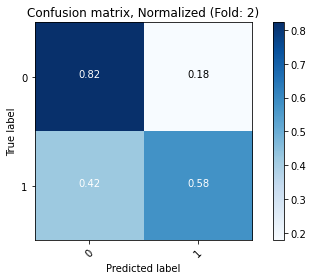

Accuracy: 0.7712418300653595


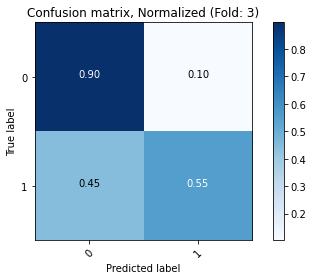

Accuracy: 0.8300653594771242


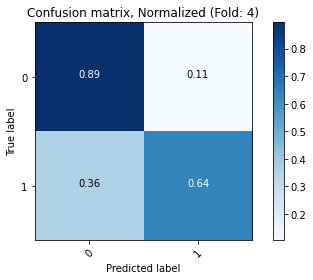

Accuracy: 0.7581699346405228


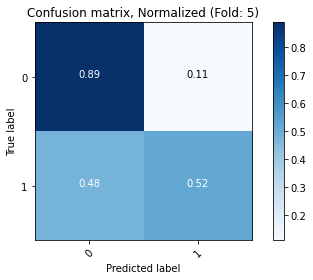


### Overall Results ###
Accuracy: 0.7575757575757576


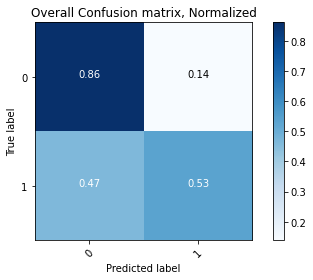

In [5]:
import numpy as np
import pandas as pd

import sklearn.svm as svm
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

if __name__ == "__main__":
    col_names = [
        'Pregnancies', 
        'Glucose', 
        'BllodPressure', 
        'SkinThickness', 
        'Insulin', 
        'BMI',
        'DiabetesPedigreeFunction',
        'Age','Outcome'
    ]

    feature_cols = [
        'Pregnancies',
        'Glucose',
        'BllodPressure',
        'SkinThickness',
        'Insulin',
        'BMI',
        'DiabetesPedigreeFunction',
        'Age'
    ]
    
    data_file = pd.read_csv("data-sets/diabetes.csv")

    print("\n### 5-fold Validation Results ###")
    X = data_file.iloc[1:,:8]
    y = data_file.iloc[1:,8]
    fold_accuracies = []
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    KFold(n_splits=5, random_state=None, shuffle=False)

    i = 1
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        classifier = svm.SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, y_train)

        prediction = classifier.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, prediction))

        cnf_matrix = confusion_matrix(y_test, prediction)

        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=["0", "1"], normalize=True, title='Confusion matrix, Normalized (Fold: ' + str(i) + ")")
        plt.show()
        i += 1

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    classifier = svm.SVC(kernel = 'linear', random_state = 0)

    classifier = classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)

    print("\n### Overall Results ###")
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

    cnf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["0", "1"], normalize=True, title='Overall Confusion matrix, Normalized')
    plt.show()

# 2b)


### Max Depth Set To:  2

[5-fold Validation Results ###]
Accuracy:  0.7337662337662337
Accuracy:  0.6883116883116883
Accuracy:  0.7987012987012987
Accuracy:  0.8431372549019608
Accuracy:  0.738562091503268

### Overall Results
Accuracy: 0.7575757575757576
Standard Dev: 0.05421323354861957


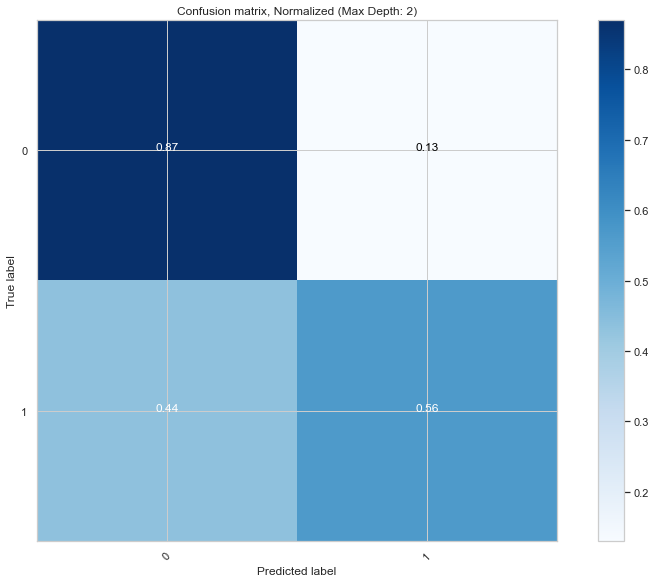


### Max Depth Set To:  3

[5-fold Validation Results ###]
Accuracy:  0.7272727272727273
Accuracy:  0.6688311688311688
Accuracy:  0.7987012987012987
Accuracy:  0.8300653594771242
Accuracy:  0.7254901960784313

### Overall Results
Accuracy: 0.7575757575757576
Standard Dev: 0.057424543224021365


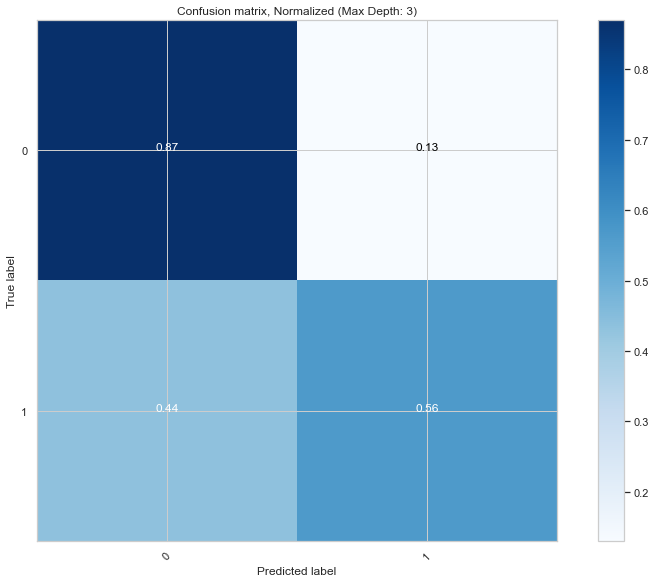


### Max Depth Set To:  4

[5-fold Validation Results ###]
Accuracy:  0.7337662337662337
Accuracy:  0.6558441558441559
Accuracy:  0.7727272727272727
Accuracy:  0.8235294117647058
Accuracy:  0.7254901960784313

### Overall Results
Accuracy: 0.7662337662337663
Standard Dev: 0.05541487137874357


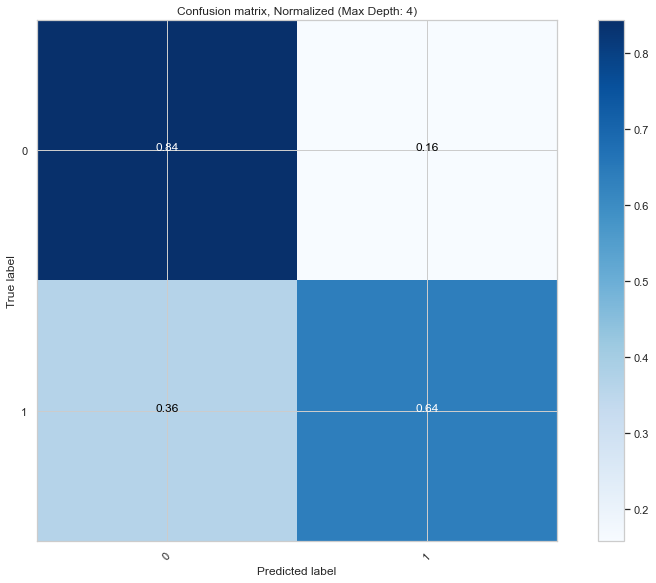


### Max Depth Set To:  5

[5-fold Validation Results ###]
Accuracy:  0.7402597402597403
Accuracy:  0.6363636363636364
Accuracy:  0.7727272727272727
Accuracy:  0.8235294117647058
Accuracy:  0.7450980392156863

### Overall Results
Accuracy: 0.7705627705627706
Standard Dev: 0.06123748513490127


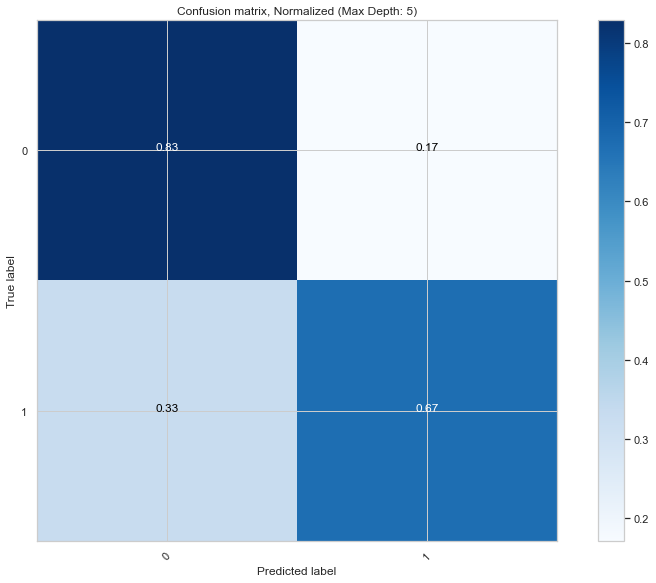


### Max Depth Set To:  6

[5-fold Validation Results ###]
Accuracy:  0.7467532467532467
Accuracy:  0.6233766233766234
Accuracy:  0.7532467532467533
Accuracy:  0.803921568627451
Accuracy:  0.7189542483660131

### Overall Results
Accuracy: 0.7056277056277056
Standard Dev: 0.05962084426226745


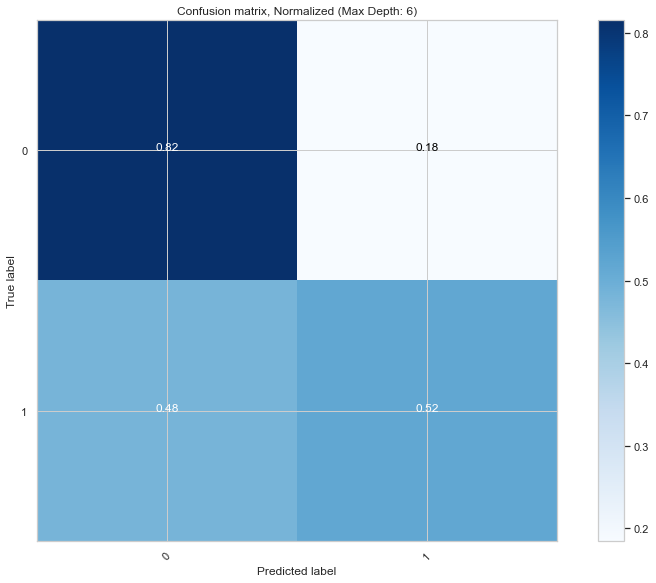


### Max Depth Set To:  7

[5-fold Validation Results ###]
Accuracy:  0.7272727272727273
Accuracy:  0.6363636363636364
Accuracy:  0.7337662337662337
Accuracy:  0.8366013071895425
Accuracy:  0.7320261437908496

### Overall Results
Accuracy: 0.7229437229437229
Standard Dev: 0.06341284190335642


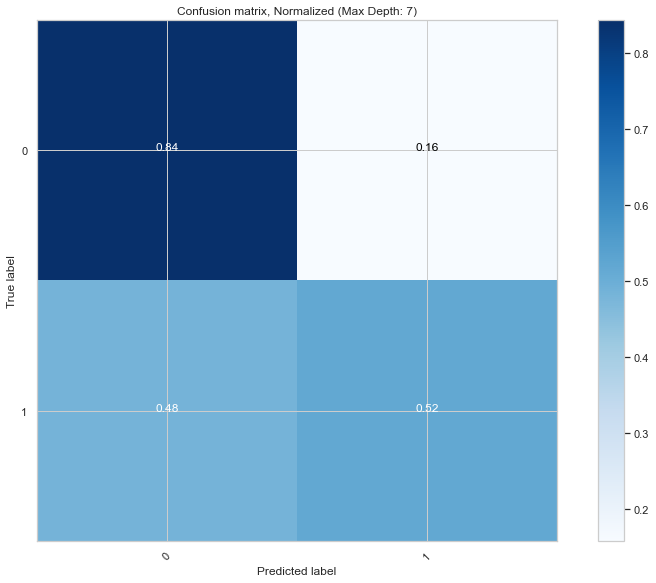


### Max Depth Set To:  8

[5-fold Validation Results ###]
Accuracy:  0.7272727272727273
Accuracy:  0.6298701298701299
Accuracy:  0.7402597402597403
Accuracy:  0.8366013071895425
Accuracy:  0.7189542483660131

### Overall Results
Accuracy: 0.7186147186147186
Standard Dev: 0.06576136915978115


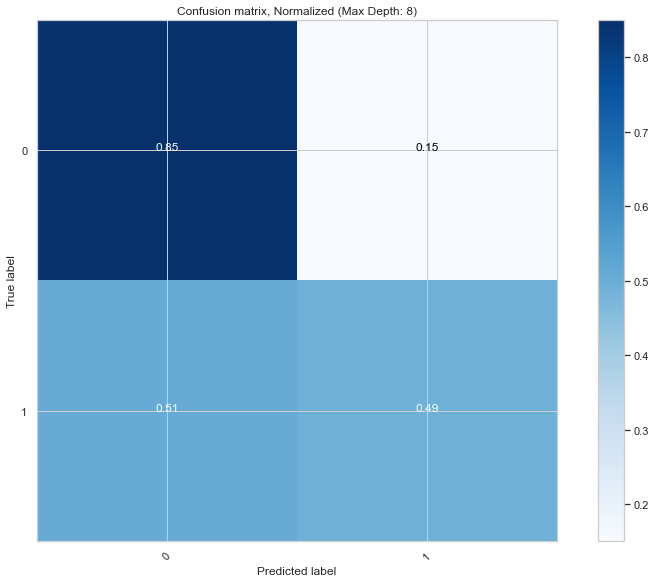

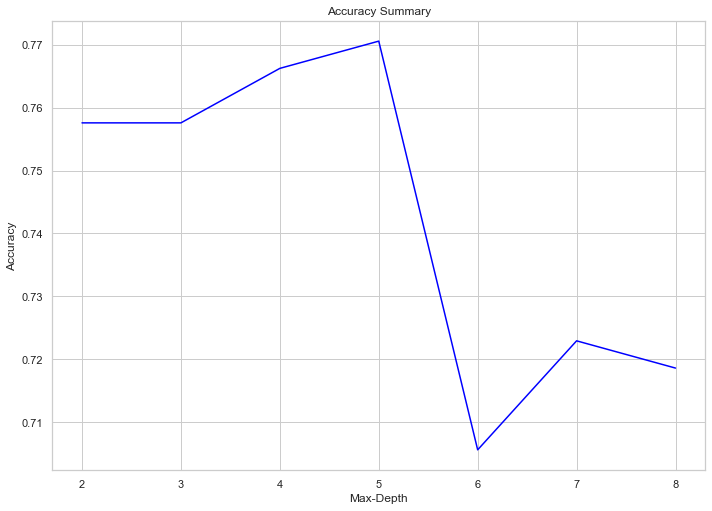

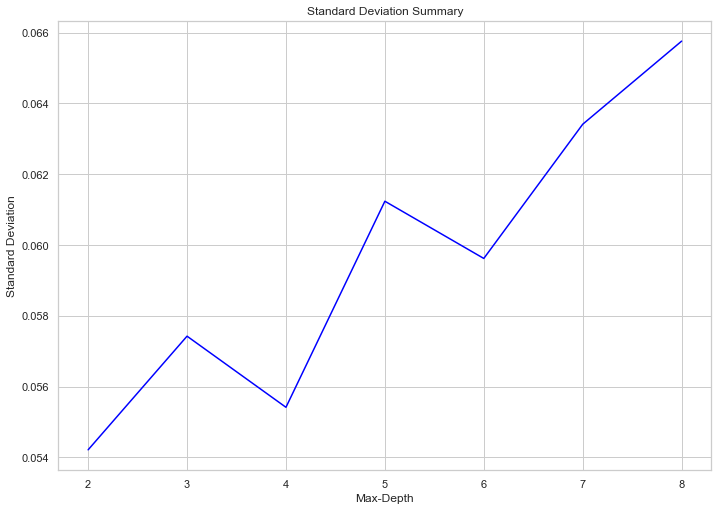

In [5]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.tree import export_graphviz
import io  
from IPython.display import Image  
import pydotplus
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

if __name__ == "__main__":
    col_names = ['Pregnancies', 'Glucose', 'BllodPressure', 'SkinThickness', 'Insulin', 'BMI',
        'DiabetesPedigreeFunction', 'Age', 'Outcome']
    data_file = pd.read_csv("data-sets/diabetes.csv", header=None)
   
    feature_cols = ['Pregnancies', 'Glucose', 'BllodPressure', 'SkinThickness', 'Insulin', 'BMI',
        'DiabetesPedigreeFunction', 'Age']
    
    accuracies = []
    stand_devs = []
    for i in range(2,9):
        print("\n### Max Depth Set To: ", i)

        X = data_file.iloc[1:,:8] # Features
        y = data_file.iloc[1:,8] # Target variable
        fold_accuracies = []
        kf = KFold(n_splits=5)
        kf.get_n_splits(X)
        KFold(n_splits=5, random_state=None, shuffle=False)

        print("\n[5-fold Validation Results ###]")
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            clf = DecisionTreeClassifier(max_depth=i)
            clf = clf.fit(X_train,y_train)
            y_pred = clf.predict(X_test)
            print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
            fold_accuracies.append(metrics.accuracy_score(y_test, y_pred))

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

        clf = DecisionTreeClassifier(max_depth=i)

        # Train Decision Tree Classifer
        clf = clf.fit(X_train,y_train)

        #Predict the response for test dataset
        y_pred = clf.predict(X_test)

        accuracy = metrics.accuracy_score(y_test, y_pred)
        stand_dev = np.std(fold_accuracies)
        accuracies.append(accuracy)
        stand_devs.append(stand_dev)

        print("\n### Overall Results")
        print("Accuracy:",accuracy)
        print("Standard Dev:", stand_dev)

        dot_data = io.StringIO()  
        export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
            special_characters=True,feature_names = feature_cols,class_names=['0','1'])
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
        filename = 'tree-graphs/diabetes-' + str(i) + '.png'
        file = open(filename, 'w+') 
        file.close() 
        graph.write_png(filename)
        Image(graph.create_png())

        cnf_matrix = confusion_matrix(y_test, y_pred)

        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=["0", "1"], normalize=True, title='Confusion matrix, Normalized (Max Depth: ' + str(i) + ")")
        plt.show()

    plt.title("Accuracy Summary")
    plt.xlabel("Max-Depth")
    plt.ylabel("Accuracy")
    plt.plot(range(2,9), accuracies, color='blue')
    plt.show()
    plt.title("Standard Deviation Summary")
    plt.xlabel("Max-Depth")
    plt.ylabel("Standard Deviation")
    plt.plot(range(2,9), stand_devs, color='blue')
    plt.show()

# 2c)

With this dataset, the decision tree using a max depth value of 4-5 seems to slightly outperform the SVM classifier in accuracy. Beyond the max depth value of 5, the decision tree classifier accuracy dramatically drops of, which I believe is due to the data set being over fit by the classifier. Although a max depth of 5 can achieve a slightly higher accuracy level than 4 in some instances, 4 has a much lower standard deviation on average which is something to consider when selecting this value for the final model.

# 3)

processing data
### Degree = 1 ###
Fitting model to polyreg
Fitting Model to linreg
Making predictions
Final Cost: 0.07


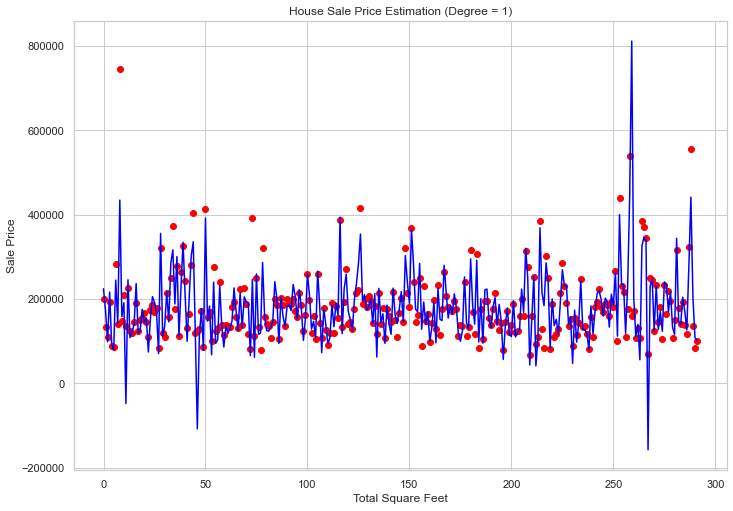

### Degree = 2 ###
Fitting model to polyreg
Fitting Model to linreg
Making predictions
Final Cost: 16.32


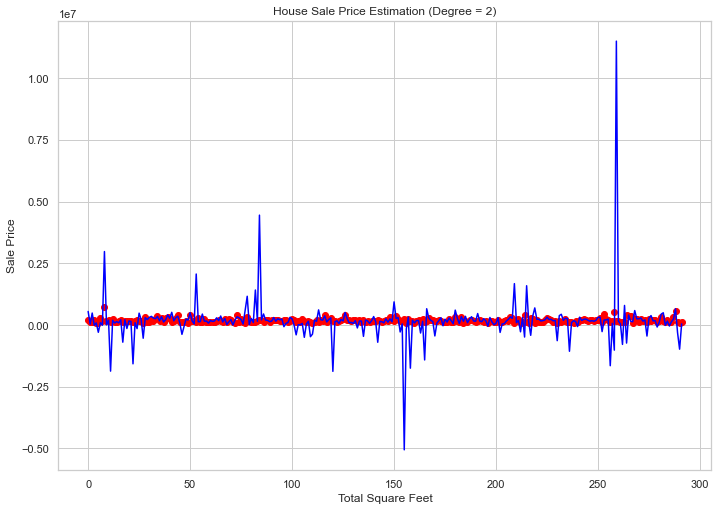

### Degree = 3 ###
Fitting model to polyreg
Fitting Model to linreg
Making predictions
Final Cost: 155.18


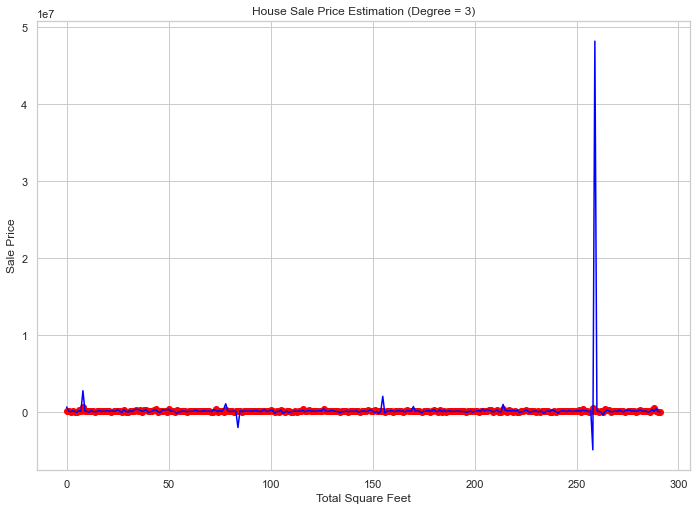

### Degree = 4 ###
Fitting model to polyreg


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# list of columns that require pre-processing
string_val_cols = [
    'MSZoning',
    'Street',
    'Alley',
    'LotShape',
    'LandContour',
    'Utilities',
    'LotConfig',
    'LandSlope',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'ExterQual',
    'ExterCond',
    'Foundation',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'Heating',
    'HeatingQC',
    'CentralAir',
    'Electrical',
    'KitchenQual',
    'Functional',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
    'PoolQC',
    'Fence',
    'MiscFeature',
    'SaleType',
    'SaleCondition']

# create the Labelencoder object
le = preprocessing.LabelEncoder()

# Importing the dataset
dataset = pd.read_csv("data-sets/housing-prices-dataset/train.csv")
X = dataset.iloc[:,1:len(dataset.loc[0,:])-1]
y = dataset.iloc[:, len(dataset.loc[0,:])-1]

print("processing data")
for col in string_val_cols:
    #print("Processing " + col)
    X[col] = le.fit_transform(X[col].astype(str))
X = np.nan_to_num(X)
y = np.nan_to_num(y)

for i in range(1,5):
    print("### Degree = " + str(i) + " ###")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Visualizing the Linear Regression results
    poly_reg = PolynomialFeatures(degree=i)
    print("Fitting model to polyreg")
    X_poly = poly_reg.fit_transform(X_train)
    predict_ = poly_reg.fit_transform(X_test)

    pol_reg = LinearRegression()
    print("Fitting Model to linreg")
    pol_reg.fit(X_poly, y_train)

    print("Making predictions")
    prediction = pol_reg.predict(predict_)

    diff = np.divide(prediction - y_test, y_test)
    cost = np.sum(diff ** 2) / (2. * len(y_test))
    print("Final Cost: %.2f" % cost)

    # Visualizing the Polymonial Regression results
    def viz_polymonial():
        plt.scatter(range(len(X_test)), y_test, color='red')
        plt.plot(range(len(X_test)), pol_reg.predict(poly_reg.fit_transform(X_test)), color='blue')
        title = 'House Sale Price Estimation (Degree = ' + str(i) + ')'
        plt.title(title)
        plt.xlabel('Total Square Feet')
        plt.ylabel('Sale Price')
        plt.show()
        return
    viz_polymonial()

A degree of 1 for the polynomial regression model on this data set seems to perform the best with a cost value of 0.07. The degrees beyond 1 seem to overfit the data set, resulting in significantly higher cost values

# 4ab)

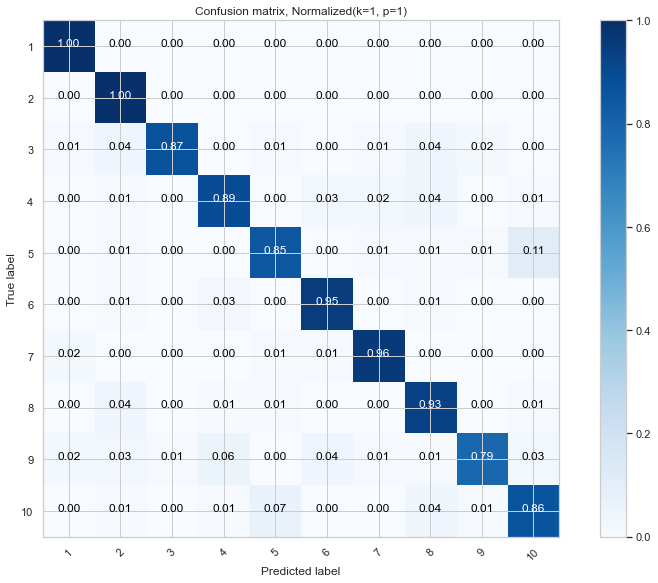

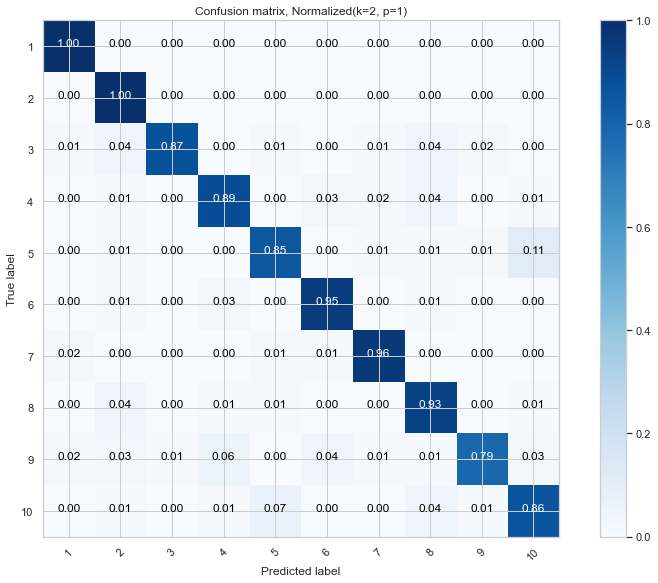

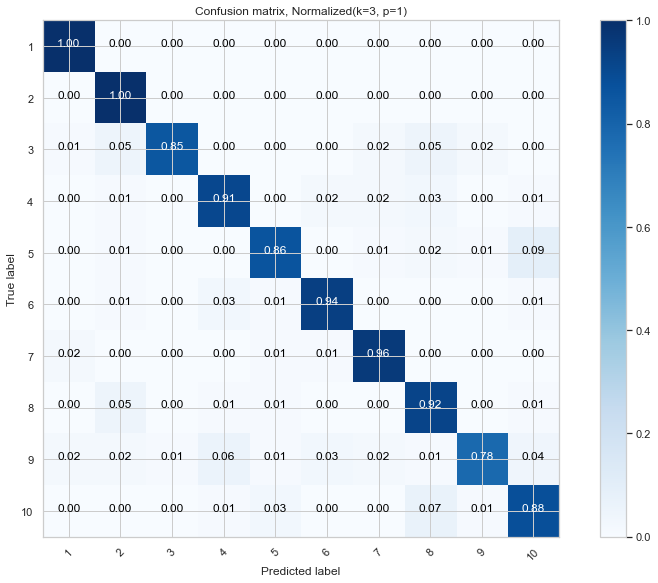

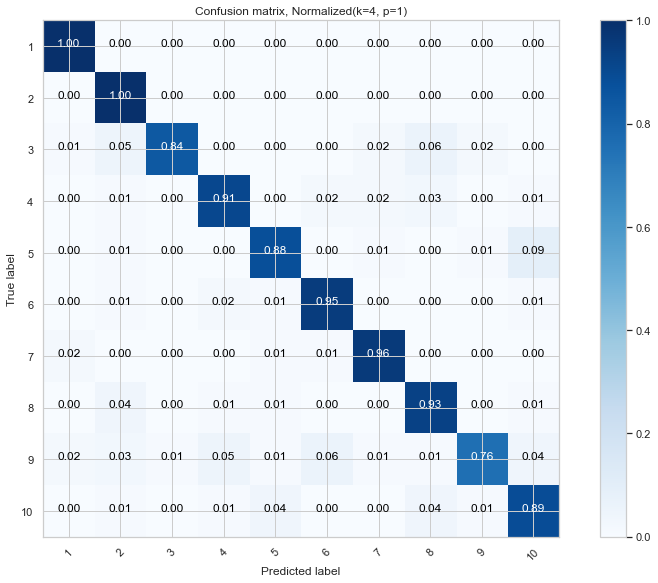

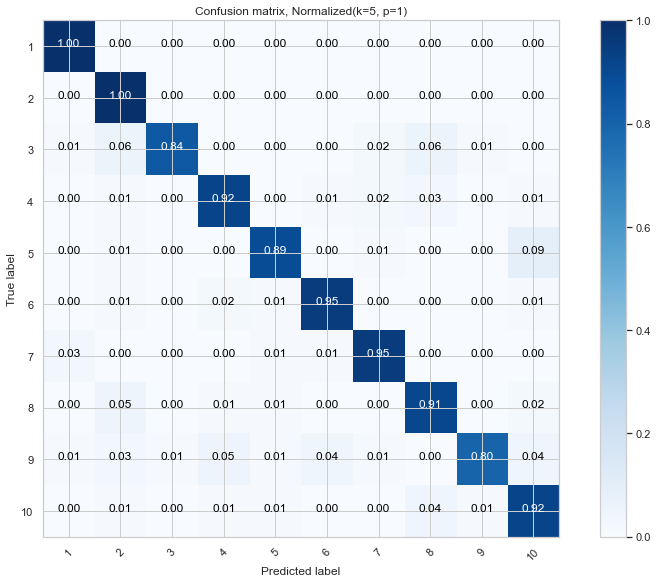

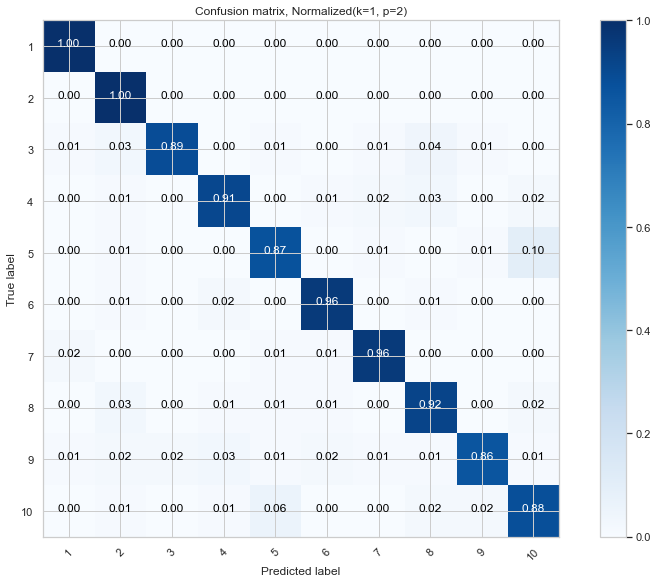

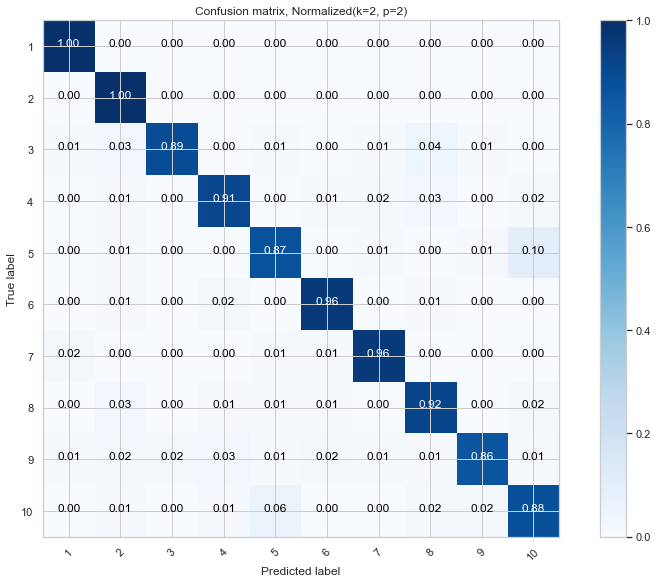

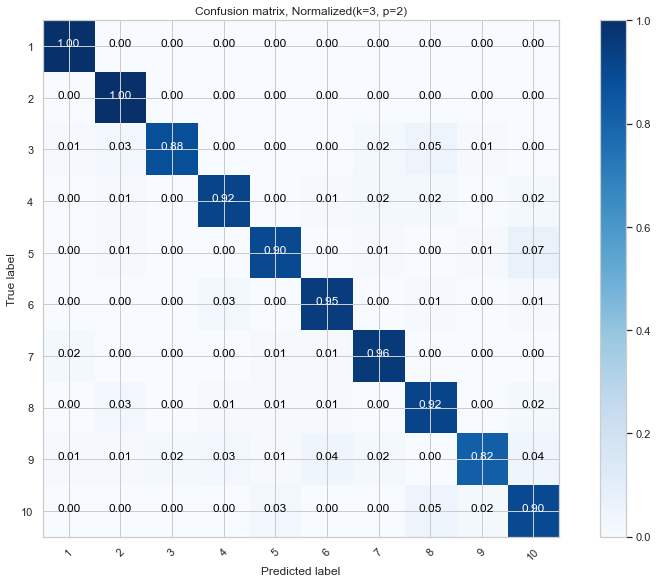

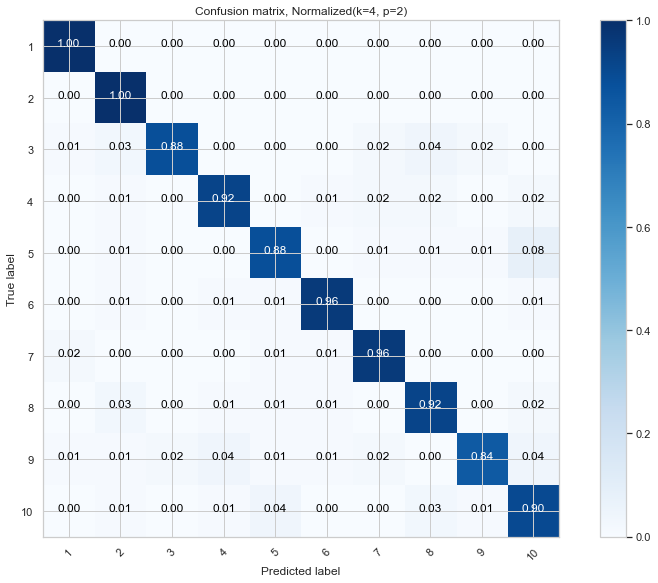

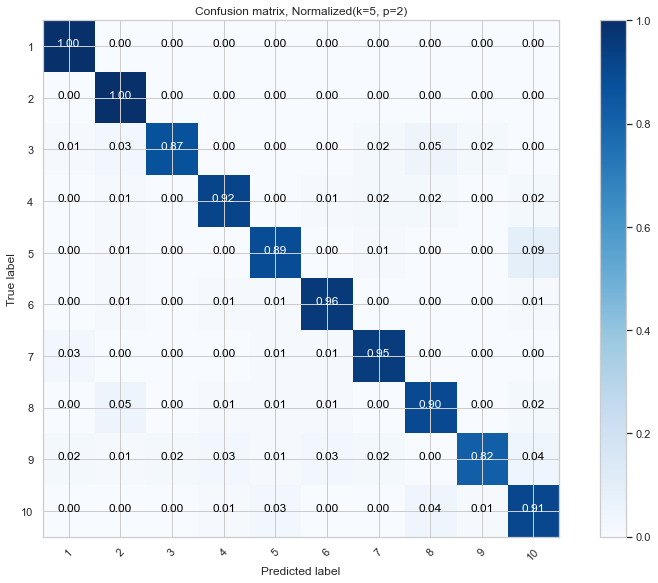

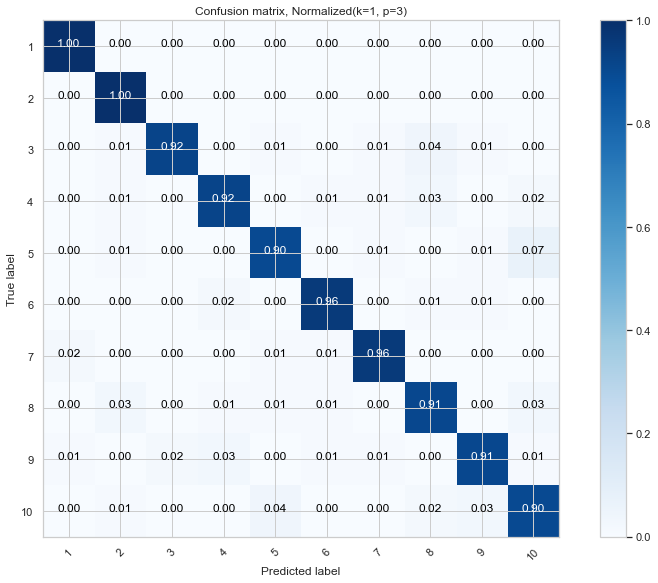

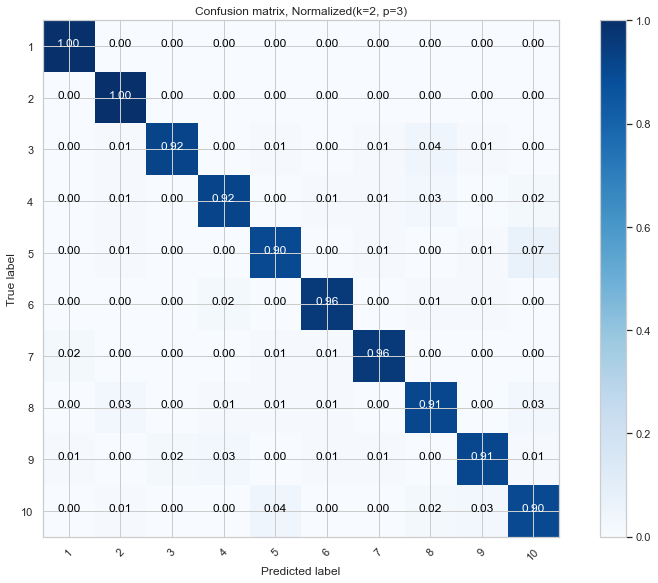

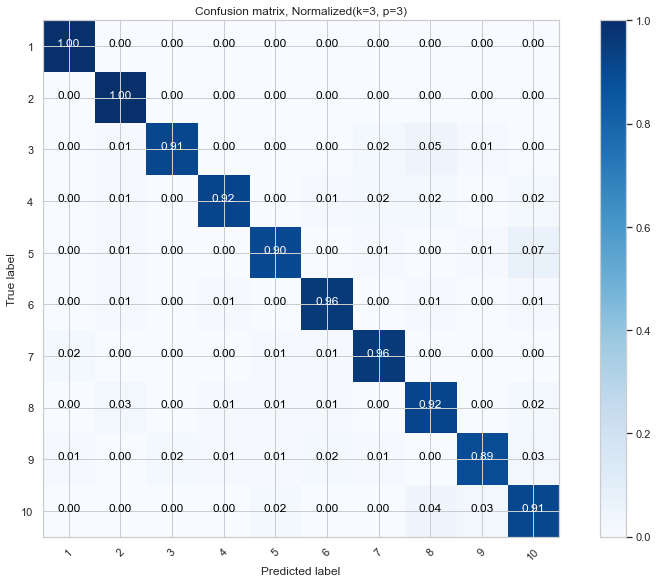

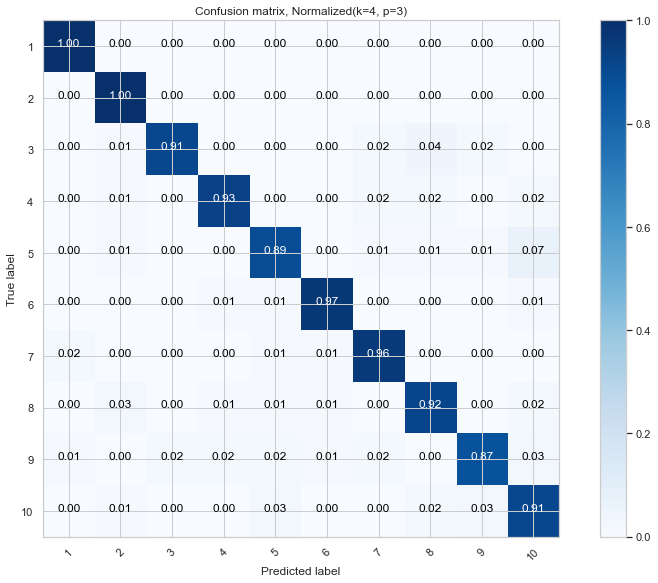

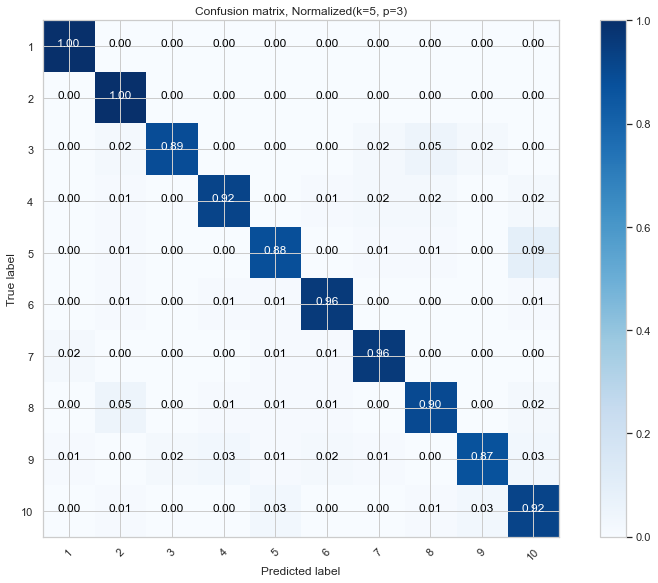

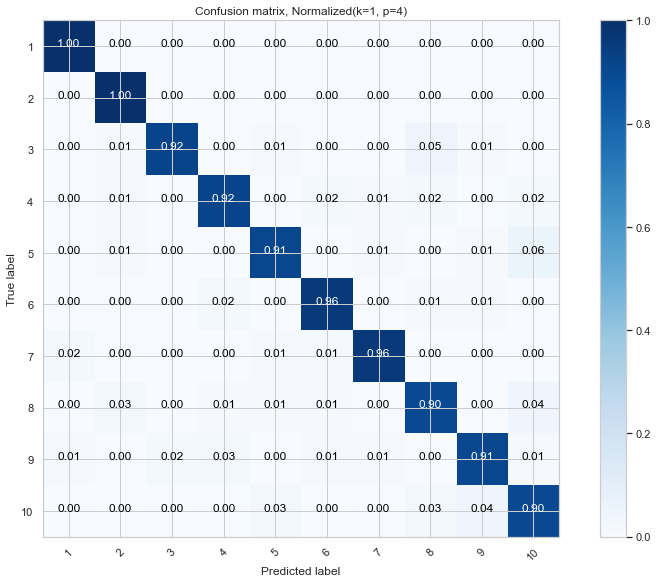

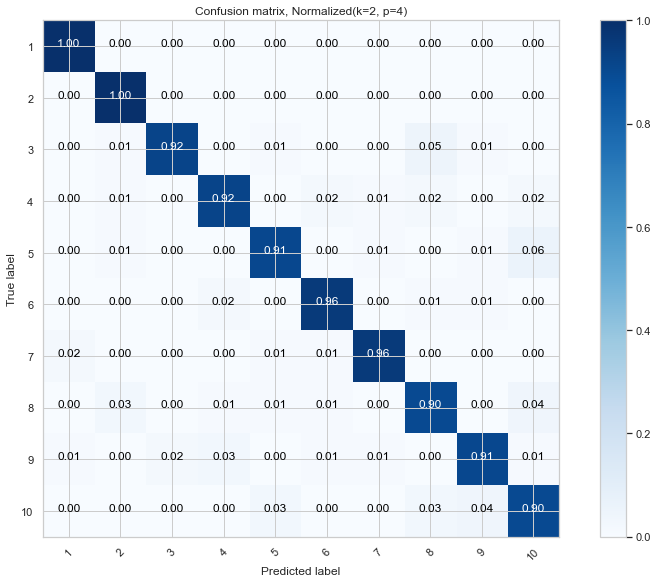

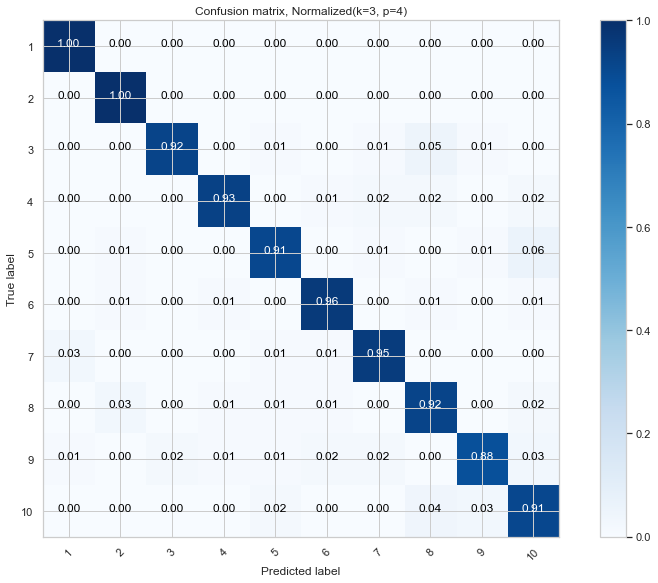

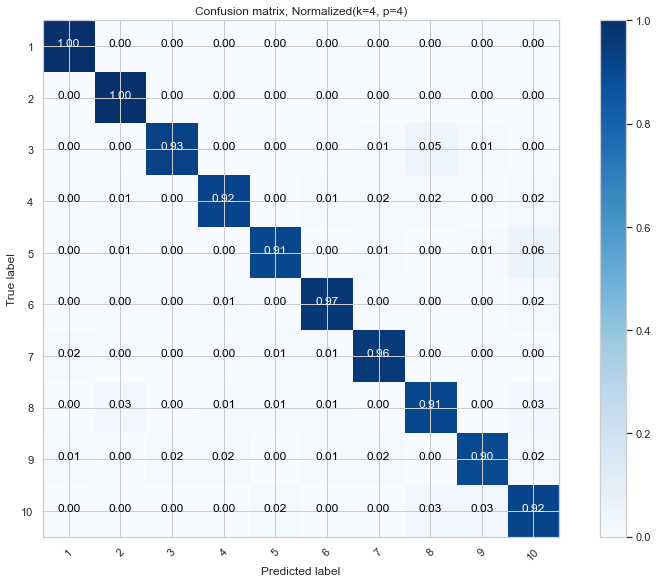

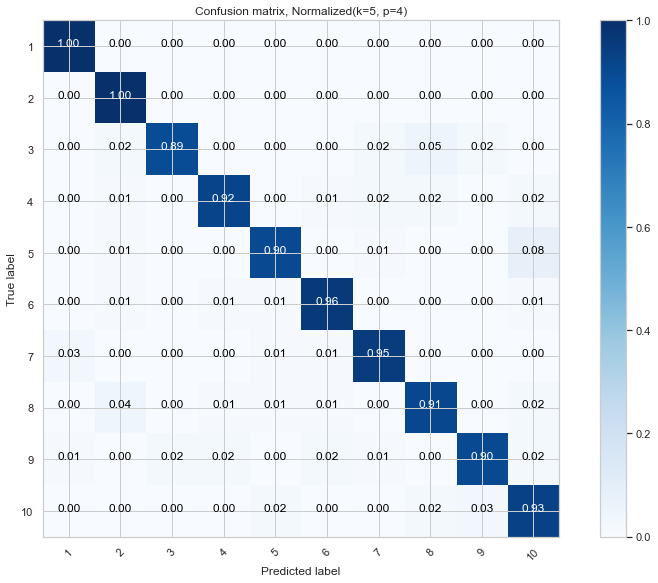

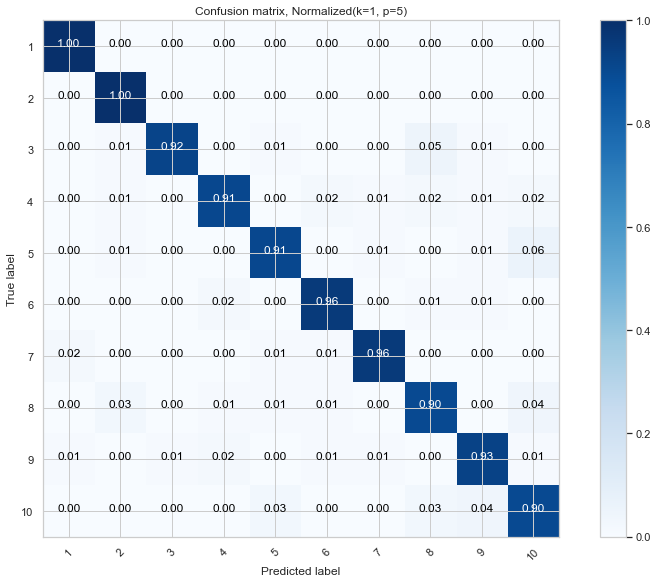

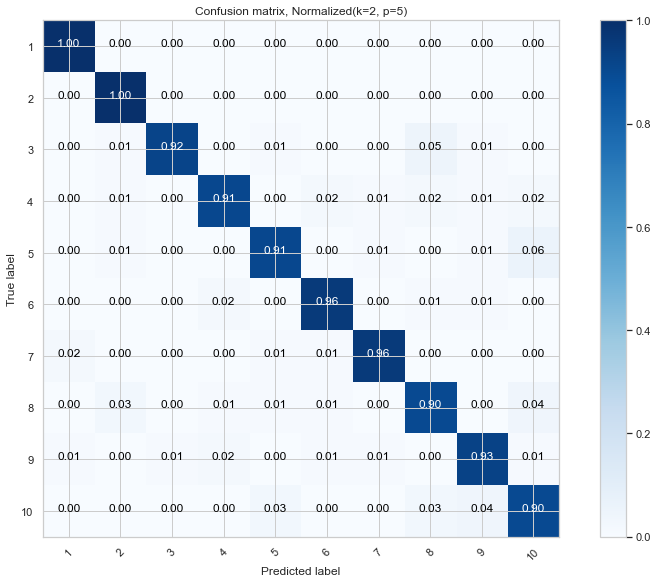

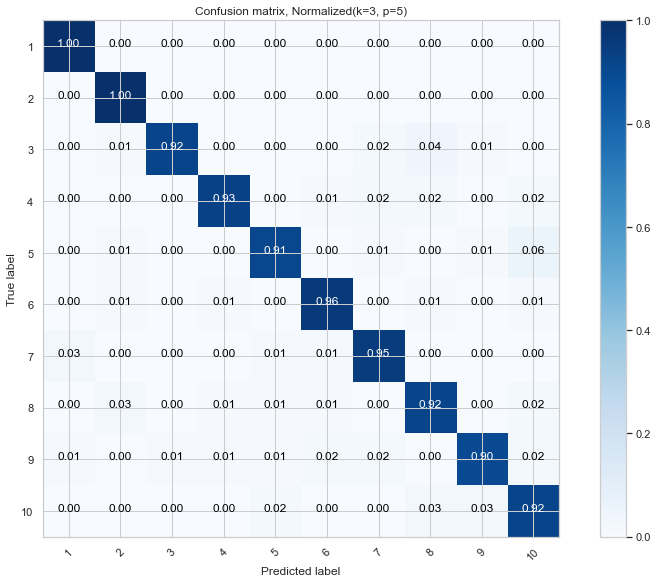

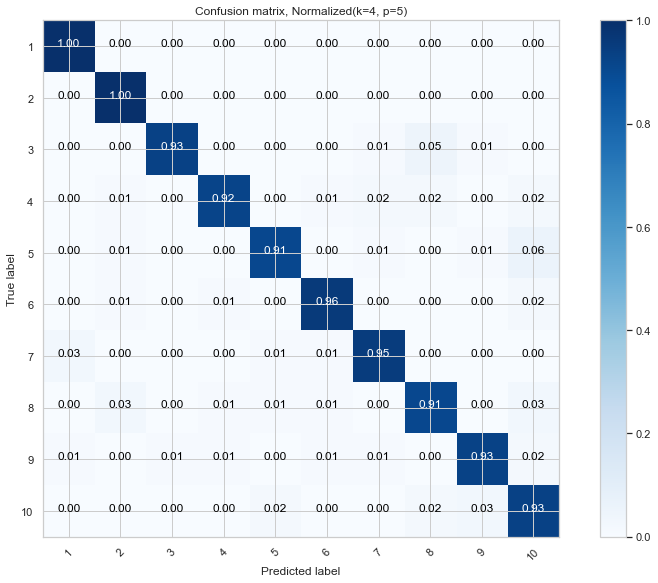

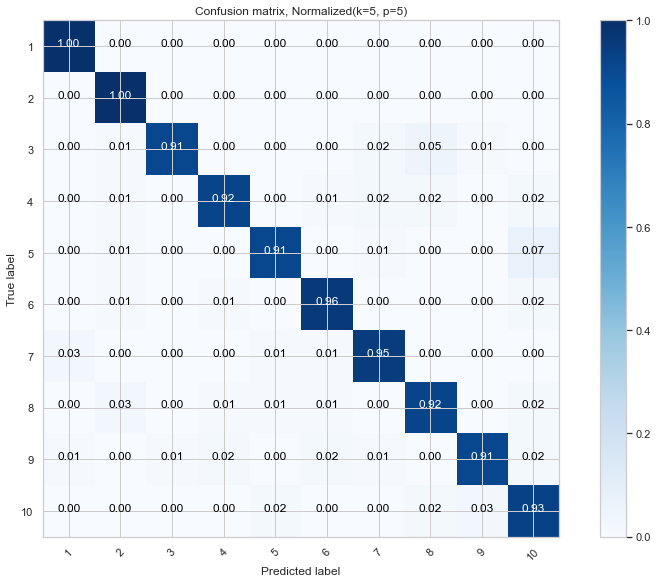

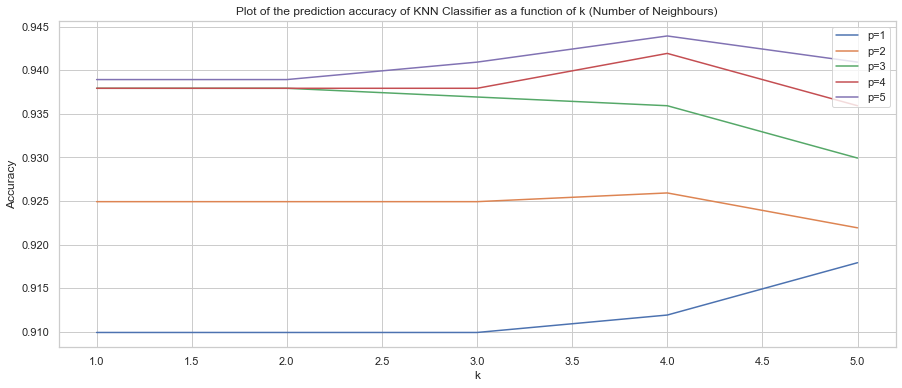

In [2]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import operator

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def minkowski_distance(x, y, p_value):  
    return np.divide(np.sum(np.power((np.abs(x-y)), p_value)),(1 / p_value))

def get_neighbours(X_train, X_test_instance, k, p):
    distances = []
    neighbors = []
    for i in range(0, X_train.shape[0]):
        dist = minkowski_distance(X_train[i], X_test_instance, p)
        distances.append((i, dist))
    distances.sort(key=operator.itemgetter(1))
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def predictKNNClass(output, y_train):
    classVotes = {}
    for i in range(len(output)):
        if y_train.values[output[i], 0] in classVotes:
            classVotes[y_train.values[output[i], 0]] += 1
        else:
            classVotes[y_train.values[output[i], 0]] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def KNN(X_train, X_test, Y_train, Y_test, k, p):
    output_classes = []
    for i in range(0, (X_test.shape[0])):
        output = get_neighbours(X_train.values, X_test.iloc[i,:].values, k, p)
        predictedClass = predictKNNClass(output, Y_train)
        output_classes.append(predictedClass)
    return output_classes

def prediction_accuracy(predicted_labels, original_labels):
    count = 0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == original_labels.values[i, 0]:
            count += 1
    return float(count)/len(predicted_labels)

if __name__ == '__main__':
    X_train = pd.read_csv("data-sets/reducedMNIST/train.csv")
    y_train = pd.read_csv("data-sets/reducedMNIST/train_labels.csv")
    X_test = pd.read_csv("data-sets/reducedMNIST/test.csv")
    y_test = pd.read_csv("data-sets/reducedMNIST/test_labels.csv")
    
    final_accuracies = []

    for p in range(1, 6):
        predicted_classes = {}
        accuracies = {}
        for k in range(1, 6):
            predicted_classes[k] = KNN(X_train, X_test, y_train, y_test, k, p)
            accuracies[k] = prediction_accuracy(predicted_classes[k], y_test)
            prediction_accuracy(predicted_classes[k], y_test)
            
            cnf_matrix = confusion_matrix(y_test, predicted_classes[k])

            title = 'Confusion matrix, Normalized(k=' + str(k) + ', p=' + str(p) + ')'
            plt.figure()
            plot_confusion_matrix(cnf_matrix, classes=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], normalize=True, title=title)
            plt.show()

        final_accuracies.append(accuracies)
        
    plt.figure(figsize=(15, 6))
    p = 1
    for accuracy in final_accuracies:
        label = 'p=' + str(p)
        plt.plot(list(accuracy.keys()),list(accuracy.values()), label=label)
        p += 1
    
    plt.legend(loc="upper right")
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.title("Plot of the prediction accuracy of KNN Classifier as a function of k (Number of Neighbours)")
    plt.show()

# 4c)

To find values for the final model of p and k, I would loop through 1 to the number of classes in the data set. I would compare the accuracies of predictions from running each p and k value over the training data, and choose the value set holding the highest accuracy. I would then run the test set to make predictions